In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/train_data_cleaned.csv")

In [ ]:
df.head()

,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,10178643.0,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,10513916.0,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,10334589.0,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,10458365.0,0,0,0,0,1,2345.49,2069.55,9243.99,4


In [ ]:
# traindf splitting to train_test_split
from sklearn.model_selection import train_test_split


# Splitting the data
X = df[['luxury_sales', 'fresh_sales', 'dry_sales','outlet_city_0','outlet_city_1','outlet_city_2','outlet_city_3','outlet_city_4']]  # Features
y = df['cluster_category']  # dependant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.98%


In [ ]:
y_train_pred = rf_model.predict(X_train)  # Get predictions on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 100.00%


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56972
           2       1.00      1.00      1.00     46367
           3       1.00      1.00      1.00      7277
           4       1.00      1.00      1.00     51589
           5       1.00      1.00      1.00      8789
           6       1.00      1.00      1.00     50733

    accuracy                           1.00    221727
   macro avg       1.00      1.00      1.00    221727
weighted avg       1.00      1.00      1.00    221727



In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    132007
           2       1.00      1.00      1.00    108693
           3       1.00      1.00      1.00     16835
           4       1.00      1.00      1.00    120843
           5       1.00      1.00      1.00     20507
           6       1.00      1.00      1.00    118476

    accuracy                           1.00    517361
   macro avg       1.00      1.00      1.00    517361
weighted avg       1.00      1.00      1.00    517361



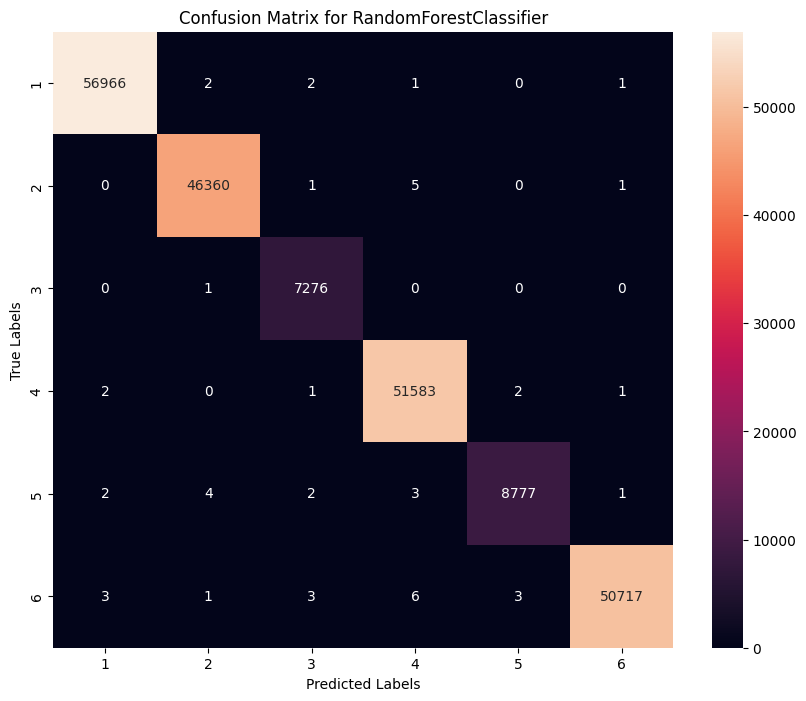

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'rf_model' is your trained RandomForestClassifier and 'y_pred' contains the predictions
cm = confusion_matrix(y_test, y_pred)  # Removed 'labels' as it's unnecessary with RF

# Get unique class labels from y_test (or y_train, they should be the same)
labels = sorted(y_test.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

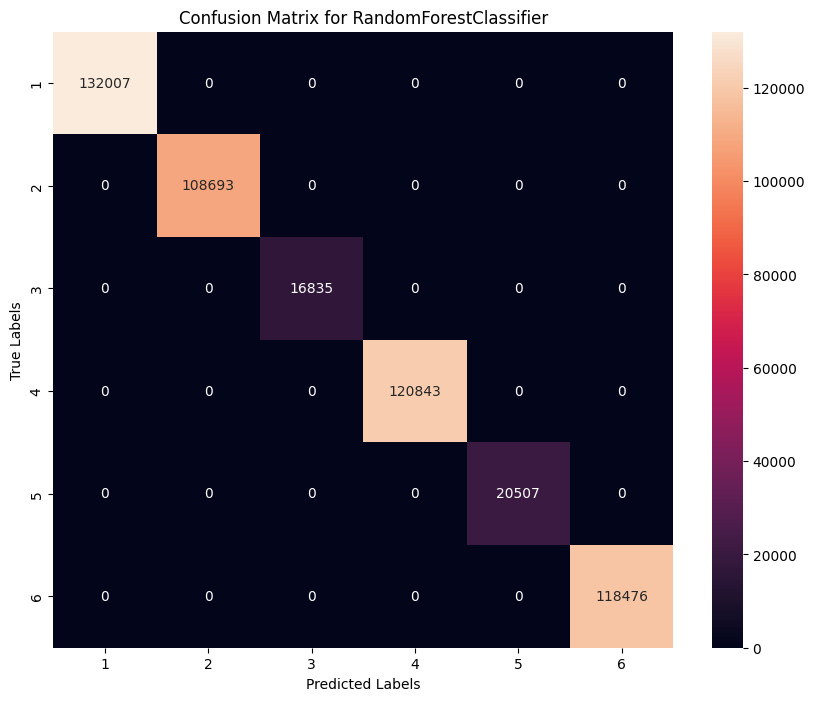

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)  # Removed 'labels' as it's unnecessary with RF

# Get unique class labels from y_test (or y_train, they should be the same)
labels = sorted(y_train.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

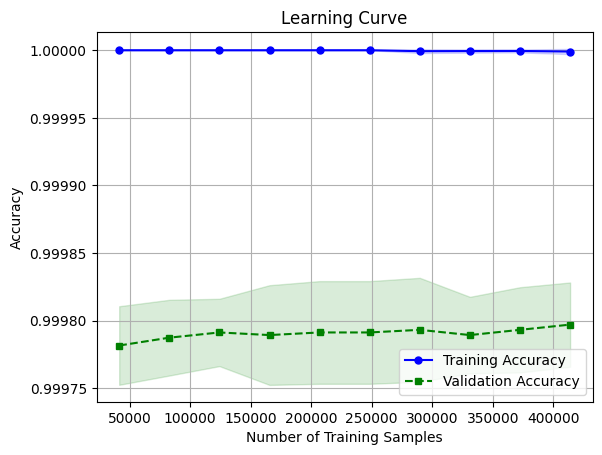

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np # Import numpy for np.linspace
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(estimator=rf_model,
                                                        X = X_train, y = y_train, cv = 5,
                                                        scoring = 'accuracy',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize = 5, label = 'Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc = 'lower right')
plt.show()

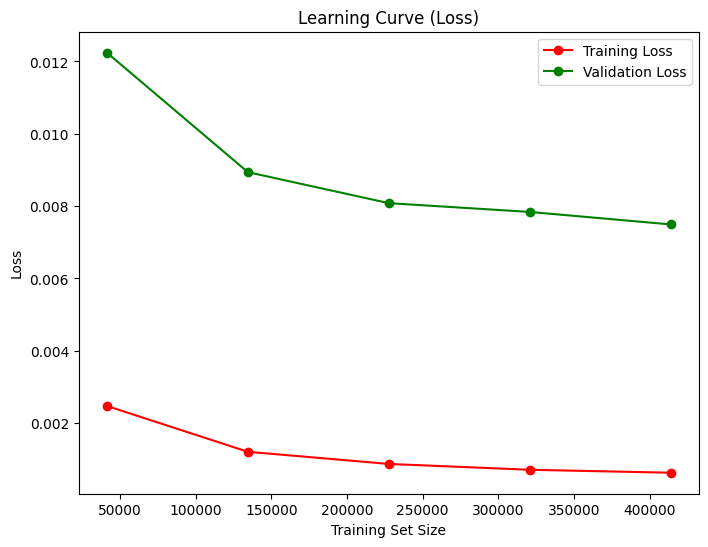

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_log_loss',  # Use 'neg_log_loss' for loss curve
    n_jobs=-1
)

# Calculate the average loss for training and validation sets
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Negate the loss values to get the actual loss
train_loss = -train_mean
validation_loss = -test_mean

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, validation_loss, 'o-', color="g", label="Validation Loss")

plt.xlabel("Training Set Size")
plt.ylabel("Loss")  # Changed y-axis label to "Loss"
plt.title("Learning Curve (Loss)")  # Updated title
plt.legend(loc="upper right")  # Adjusted legend location for loss curves
plt.show()

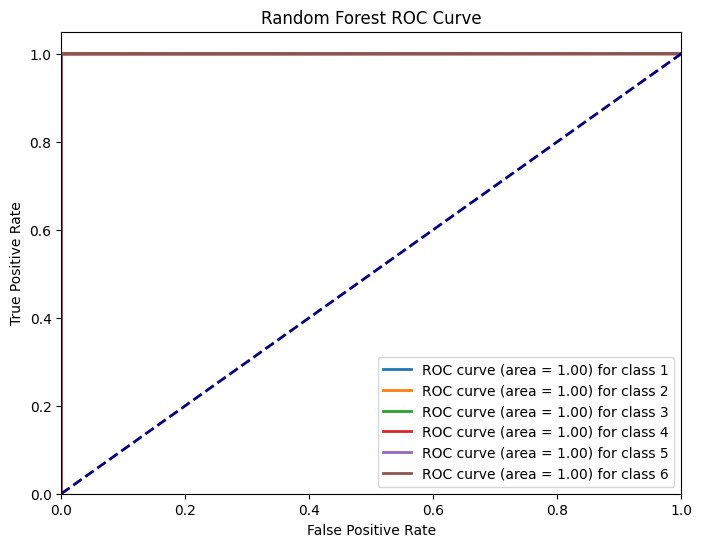

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming rf_model, X_test, y_test are already defined and rf_model is trained

# Binarize the target variable (y_test)
y_test_bin = label_binarize(y_test, classes=sorted(y_test.unique()))
n_classes = y_test_bin.shape[1]

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    # Add 1 to the class label in the plot legend
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i + 1}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()